<IPython.core.display.Javascript object>


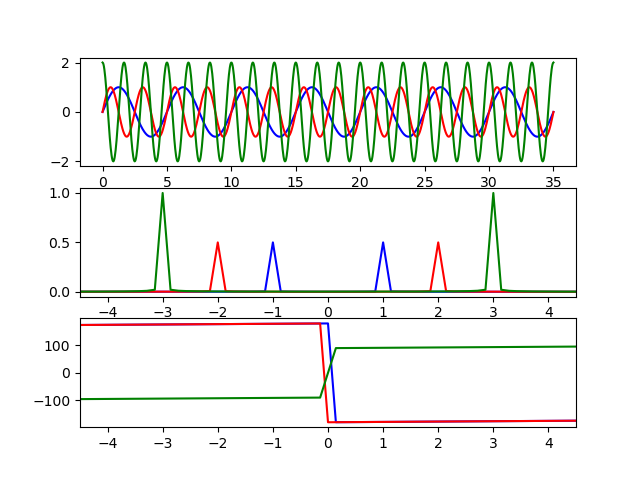

In [191]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

freqs = [1, 2, 3]
amplitues = [1, 1, 2]
phases = [0, 0, np.pi*.5]  # radians
colors = ['b', 'r', 'g']

T = 5  # period of 5 seconds 
nper = 7  # number of periods to include
N = 1000
t = np.linspace(0, nper*T, N)  # unit seconds
stot = None
fig, (axs, axf, axp) = plt.subplots(3,1)

for color, freq, amp, phase in zip(colors, freqs, amplitues, phases):
    
    s = amp*np.sin(freq*t*2*np.pi/T + phase)
    
    if stot is None:
        stot = s
    else:
        stot = stot + s
    
    axs.plot(t, s, color)
    
    f = np.fft.fft(s)
    ff = np.fft.fftfreq(n=f.size, d=nper/N)

    S = np.abs(f)/N
    S = np.fft.fftshift(S)
    ff= np.fft.fftshift(ff)
    axf.plot(ff, S, color)

    phi = np.angle(f, deg=True)
    axp.plot(ff, phi, color)

for ax in axf, axp:
    maxh = np.max(freqs)
    ax.set_xlim([-maxh*1.5, maxh*1.5])

<IPython.core.display.Javascript object>


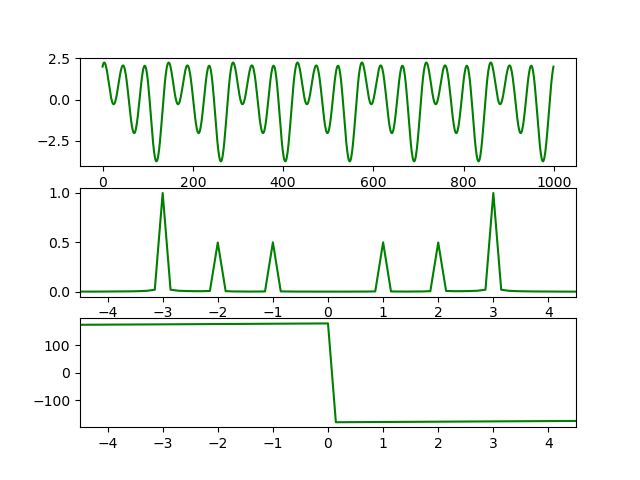

In [193]:
fig, (axs, axf, axp) = plt.subplots(3,1)
axs.plot(stot, color)

f = np.fft.fft(stot)

S = np.abs(f)/N
S = np.fft.fftshift(S)
ff= np.fft.fftshift(ff)
axf.plot(ff, S, color)

phi = np.angle(f, deg=True)
axp.plot(ff, phi, color)

for ax in axf, axp:
    maxh = np.max(freqs)
    ax.set_xlim([-maxh*1.5, maxh*1.5])

With complex numbers

<IPython.core.display.Javascript object>


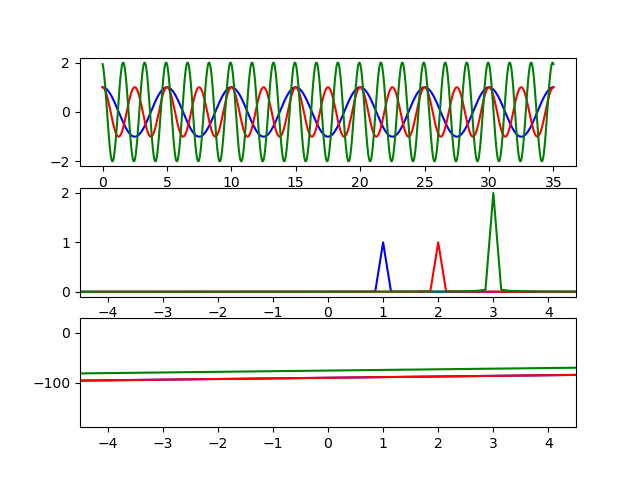

In [200]:
#freqs = [1, 2]
#amplitues = [1, 1]
#phases = [0, 0]  # radians
#colors = ['b', 'r']

fig, (axs, axf, axp) = plt.subplots(3,1)

for color, freq, amp, phase in zip(colors, freqs, amplitues, phases):
    
    s = amp * np.exp(1j*phase/(2*np.pi)) * np.exp(1j*freq*t*2*np.pi/T)
    
    if stot is None:
        stot = s
    else:
        stot = stot + s
    
    axs.plot(t, s, color)
    
    f = np.fft.fft(s)
    ff = np.fft.fftfreq(n=f.size, d=nper/N)

    S = np.abs(f)/N
    S = np.fft.fftshift(S)
    ff= np.fft.fftshift(ff)
    axf.plot(ff, S, color)

    phi = np.angle(f, deg=True)
    axp.plot(ff, phi, color)

for ax in axf, axp:
    maxh = np.max(freqs)
    ax.set_xlim([-maxh*1.5, maxh*1.5])